In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('bank.csv',sep=';')

In [33]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
df.shape

(45107, 41)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48519 entries, 0 to 48518
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48519 non-null  int64  
 1   job             48519 non-null  object 
 2   marital         48519 non-null  object 
 3   education       48519 non-null  object 
 4   default         48519 non-null  object 
 5   housing         48519 non-null  object 
 6   loan            48519 non-null  object 
 7   contact         48519 non-null  object 
 8   month           48519 non-null  object 
 9   day_of_week     48519 non-null  object 
 10  duration        48519 non-null  int64  
 11  campaign        48519 non-null  int64  
 12  pdays           48519 non-null  int64  
 13  previous        48519 non-null  int64  
 14  poutcome        48519 non-null  object 
 15  emp.var.rate    48518 non-null  float64
 16  cons.price.idx  48518 non-null  float64
 17  cons.conf.idx   48518 non-null 

In [36]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,48519.000000,48519.000000,48519.000000,48519.000000,48519.000000,48518.000000,48518.000000,48518.000000,48518.000000,48518.000000
mean,40.047775,258.153527,2.639852,967.994147,0.146829,0.281024,93.595359,-40.388666,3.824043,5176.261348
std,10.306748,260.831287,2.905518,172.708050,0.460170,1.522463,0.543145,4.459136,1.668774,70.070260
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.700000,93.200000,-42.700000,1.405000,5099.100000
50%,38.000000,177.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.860000,5195.800000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [52]:
df.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.005719,-0.035284,0.025526,-0.001489,-0.004295,0.119883,0.008426,-0.016928
campaign,0.005719,1.000000,0.049336,-0.075882,0.143388,0.131974,-0.032492,0.129634,0.137077
pdays,-0.035284,0.049336,1.000000,-0.584472,0.277934,0.085591,-0.081038,0.300341,0.370798
previous,0.025526,-0.075882,-0.584472,1.000000,-0.437136,-0.214731,-0.063252,-0.466477,-0.507682
emp.var.rate,-0.001489,0.143388,0.277934,-0.437136,1.000000,0.750171,0.214102,0.974636,0.916908
cons.price.idx,-0.004295,0.131974,0.085591,-0.214731,0.750171,1.000000,0.023136,0.672912,0.515817
cons.conf.idx,0.119883,-0.032492,-0.081038,-0.063252,0.214102,0.023136,1.000000,0.287945,0.126771
euribor3m,0.008426,0.129634,0.300341,-0.466477,0.974636,0.672912,0.287945,1.000000,0.949987
nr.employed,-0.016928,0.137077,0.370798,-0.507682,0.916908,0.515817,0.126771,0.949987,1.000000


<Figure size 2880x2880 with 0 Axes>

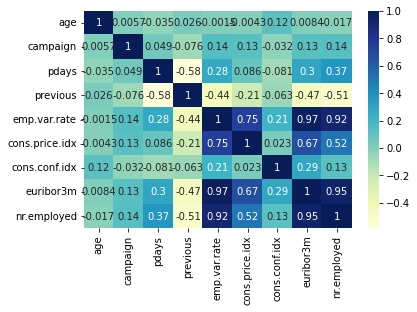

<Figure size 2880x2880 with 0 Axes>

In [54]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.figure(figsize=(40,40))

In [64]:
cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
num = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]
print(len(cat), len(num))

10 10


In [38]:
df.replace('unknown', np.NaN, inplace=True)

In [39]:
df.isnull().sum()

age                   0
job                 394
marital              94
education          2042
default           10482
housing            1117
loan               1117
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          1
cons.price.idx        1
cons.conf.idx         1
euribor3m             1
nr.employed           1
y                     1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


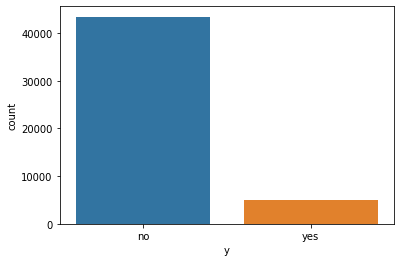

In [41]:
sns.countplot(df["y"])
plt.show()

Job


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


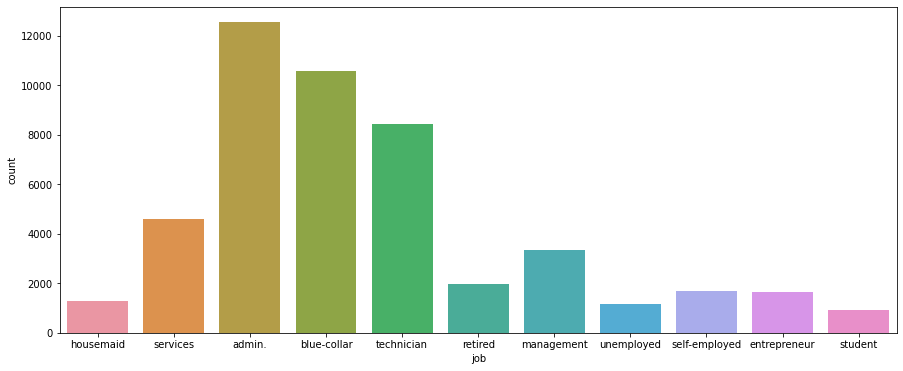

Marital


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


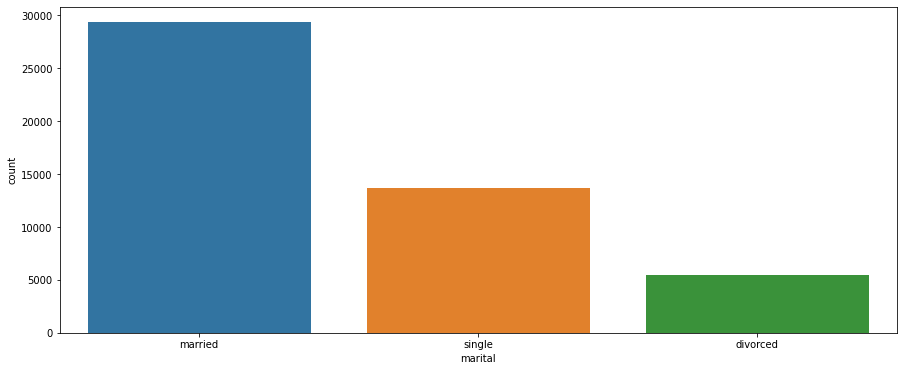

Education


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


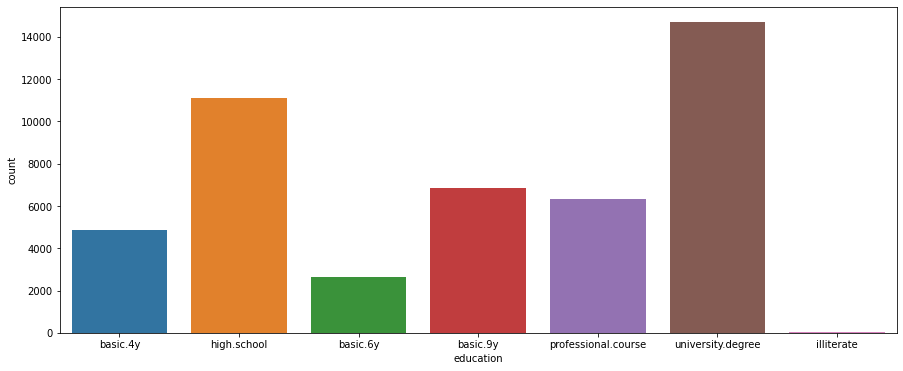

Default


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


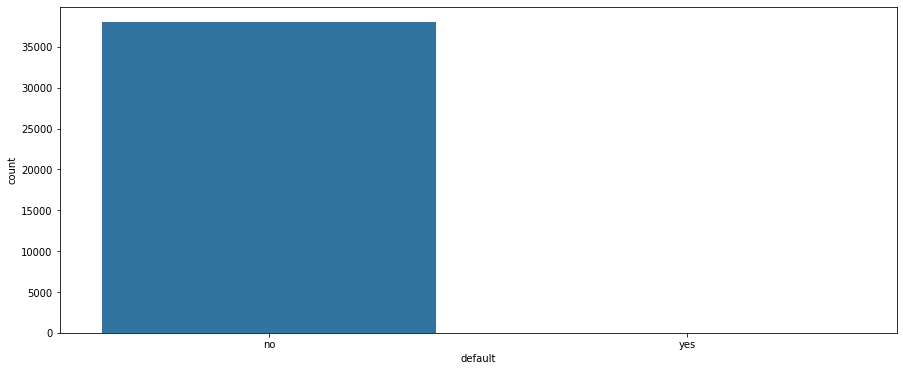

Housing


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


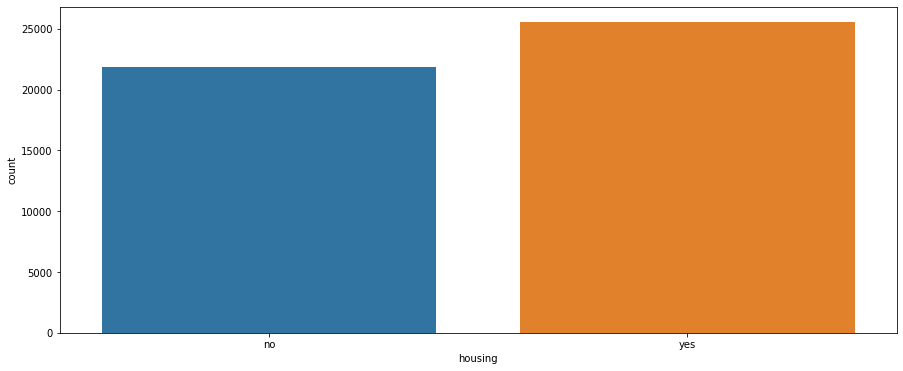

Loan


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


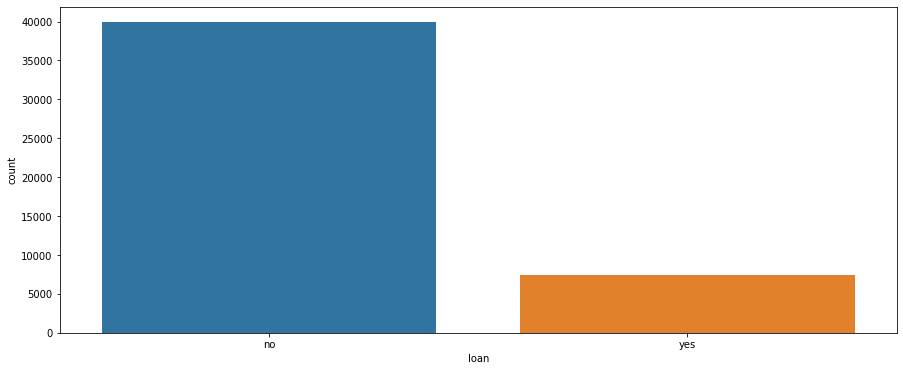

Contact


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


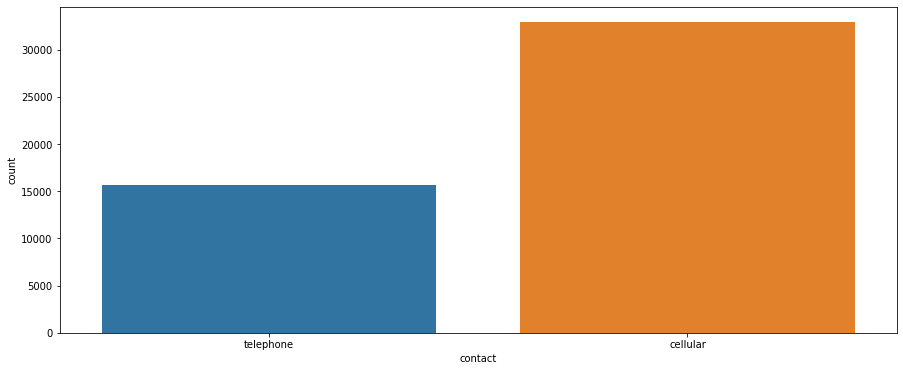

Month


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


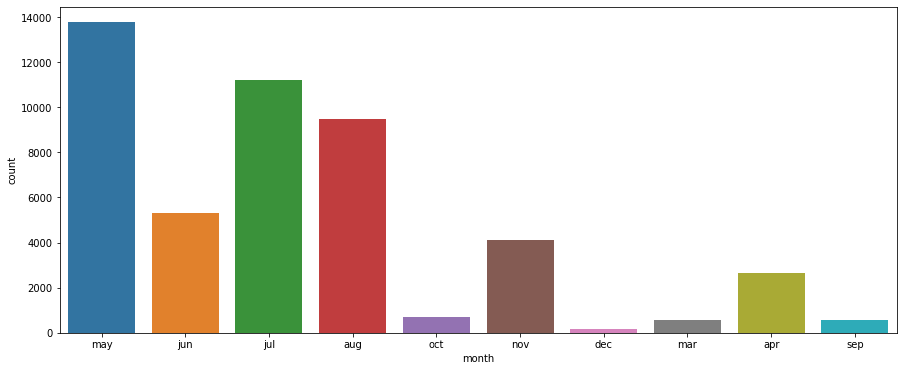

Day_Of_Week


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


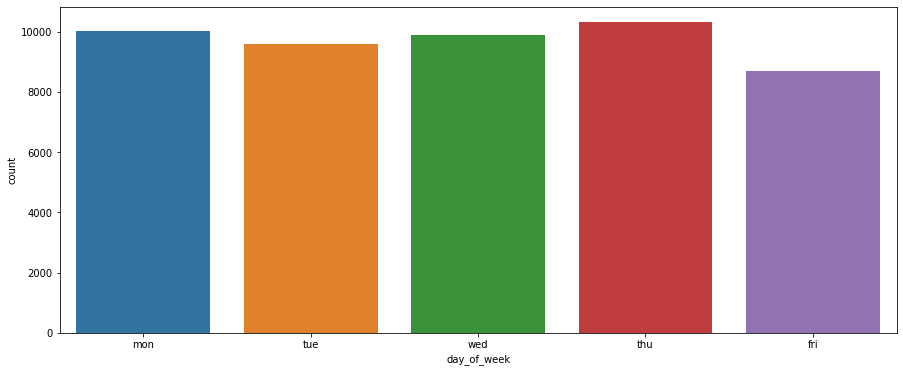

Poutcome


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


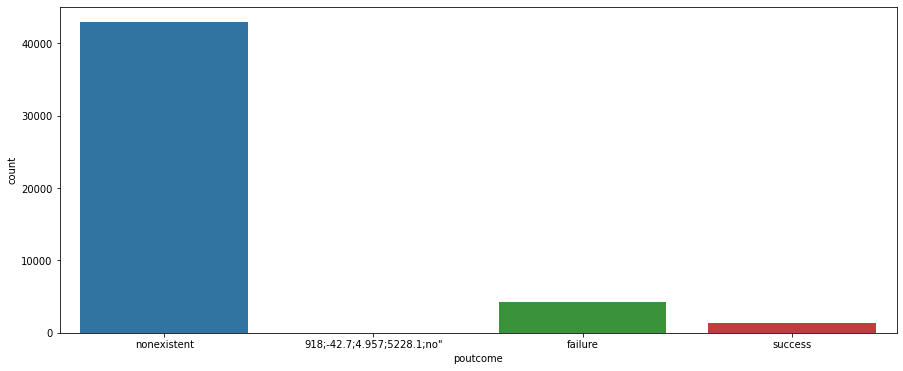

In [43]:
for column in cat:
    plt.figure(figsize=(15, 6))
    print(column.title())
    p= sns.countplot(df[column])
    plt.show()

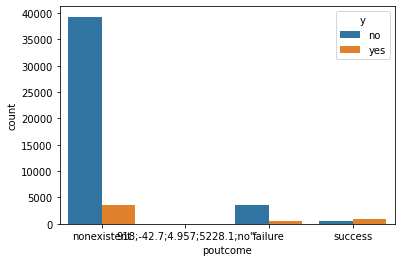

In [45]:
sns.countplot(x=df[column],hue=df["y"])

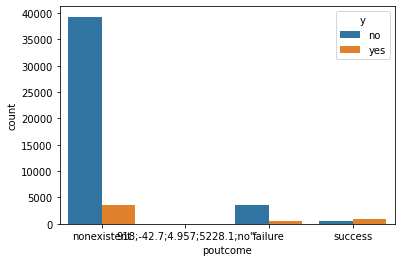

In [46]:
sns.countplot(x = df["poutcome"], hue=df["y"])

In [47]:
df.drop(["default"], axis = 1, inplace=True)

In [51]:
df.drop(["duration"], axis = 1, inplace=True)

In [56]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [71]:
df.drop(['campaign'], axis = 1, inplace=True)

In [72]:
df.dropna(inplace=True)

In [73]:
df.shape

(45107, 16)

In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [75]:
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [76]:
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,pdays,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,999,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,999,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,999,...,1,0,0,0,0,0,1,0,0,0


In [77]:
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,no,no,999,0,93.994,-36.4,4.857,no,1,...,1,0,0,0,0,0,0,0,0,0
1,57,no,no,999,0,93.994,-36.4,4.857,no,1,...,1,0,0,0,0,0,1,0,0,0
2,37,yes,no,999,0,93.994,-36.4,4.857,no,1,...,1,0,0,0,0,0,1,0,0,0
3,40,no,no,999,0,93.994,-36.4,4.857,no,1,...,1,0,0,0,1,0,0,0,0,0
4,56,no,yes,999,0,93.994,-36.4,4.857,no,1,...,1,0,0,0,0,0,1,0,0,0


In [78]:
df.columns

Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
       'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
       'basic.9y', 'high.school', 'illiterate', 'professional.course',
       'university.degree'],
      dtype='object')

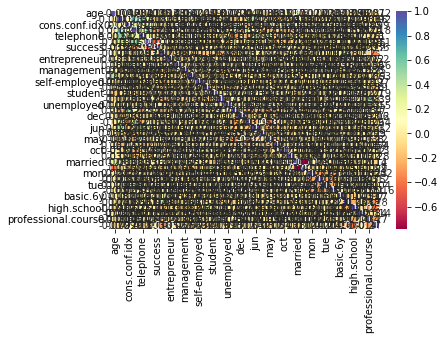

<Figure size 1080x1728 with 0 Axes>

In [82]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.figure(figsize=(15,14))
plt.show()

In [81]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45107 entries, 0 to 48518
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45107 non-null  int64  
 1   housing              45107 non-null  object 
 2   loan                 45107 non-null  object 
 3   cons.price.idx       45107 non-null  float64
 4   cons.conf.idx        45107 non-null  float64
 5   euribor3m            45107 non-null  float64
 6   y                    45107 non-null  object 
 7   telephone            45107 non-null  uint8  
 8   nonexistent          45107 non-null  uint8  
 9   success              45107 non-null  uint8  
 10  blue-collar          45107 non-null  uint8  
 11  entrepreneur         45107 non-null  uint8  
 12  housemaid            45107 non-null  uint8  
 13  management           45107 non-null  uint8  
 14  retired              45107 non-null  uint8  
 15  self-employed        45107 non-null 

In [88]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Housing']=lr.fit_transform(df["housing"])

In [89]:
df['loan1']=lr.fit_transform(df["loan"])

In [93]:
df.drop(['housing','loan'],axis=1,inplace=True)

In [94]:
df.columns

Index(['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y', 'telephone',
       'nonexistent', 'success', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'Housing', 'loan1'],
      dtype='object')

In [96]:
y=df['y']

In [108]:
x=df[['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','telephone',
       'nonexistent', 'success', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'Housing', 'loan1']]

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45107 entries, 0 to 48518
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45107 non-null  int64  
 1   cons.price.idx       45107 non-null  float64
 2   cons.conf.idx        45107 non-null  float64
 3   euribor3m            45107 non-null  float64
 4   y                    45107 non-null  object 
 5   telephone            45107 non-null  uint8  
 6   nonexistent          45107 non-null  uint8  
 7   success              45107 non-null  uint8  
 8   blue-collar          45107 non-null  uint8  
 9   entrepreneur         45107 non-null  uint8  
 10  housemaid            45107 non-null  uint8  
 11  management           45107 non-null  uint8  
 12  retired              45107 non-null  uint8  
 13  self-employed        45107 non-null  uint8  
 14  services             45107 non-null  uint8  
 15  student              45107 non-null 

In [111]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
scaler=st.fit_transform(x)
x=pd.DataFrame(scaler,columns=x.columns)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(principalDf,y,test_size=0.3,random_state=123)

In [114]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((31574, 35), (13533, 35), (31574,), (13533,))

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [124]:
#Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)
print(accuracy_score(y_test,ypred))

0.9023867582945393


In [129]:
confusion_matrix(y_test,ypred)

array([[11976,   170],
       [ 1151,   236]])

In [128]:
print("Logistic Regression")
confusion_matrix(y_test,ypred)
print(classification_report(y_test,ypred))

Logistic Regression
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     12146
         yes       0.58      0.17      0.26      1387

    accuracy                           0.90     13533
   macro avg       0.75      0.58      0.61     13533
weighted avg       0.88      0.90      0.88     13533



In [131]:
#Adaboostclassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ypred1=ada.predict(x_test)
print(accuracy_score(y_test,ypred1))

0.9003177418163009


In [134]:
confusion_matrix(y_test,ypred1)

array([[11930,   216],
       [ 1133,   254]])

In [133]:
print('AdaBoosting')
confusion_matrix(y_test,ypred1)
print(classification_report(y_test,ypred1))

AdaBoosting
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     12146
         yes       0.54      0.18      0.27      1387

    accuracy                           0.90     13533
   macro avg       0.73      0.58      0.61     13533
weighted avg       0.88      0.90      0.88     13533



In [135]:
svm=SVC()
svm.fit(x_train,y_train)
ypred2=svm.predict(x_test)
print(accuracy_score(y_test,ypred2))

0.9020911845119338


In [136]:
confusion_matrix(y_test,ypred2)

array([[11977,   169],
       [ 1156,   231]])

In [137]:
print('svm')
confusion_matrix(y_test,ypred2)
print(classification_report(y_test,ypred2))

svm
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     12146
         yes       0.58      0.17      0.26      1387

    accuracy                           0.90     13533
   macro avg       0.74      0.58      0.60     13533
weighted avg       0.88      0.90      0.88     13533



In [138]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
ypred3=knn.predict(x_test)
print(accuracy_score(y_test,ypred3))

0.8972142170989433


In [139]:
confusion_matrix(y_test,ypred3)

array([[11819,   327],
       [ 1064,   323]])

In [140]:
print('knn')
confusion_matrix(y_test,ypred3)
print(classification_report(y_test,ypred3))

knn
              precision    recall  f1-score   support

          no       0.92      0.97      0.94     12146
         yes       0.50      0.23      0.32      1387

    accuracy                           0.90     13533
   macro avg       0.71      0.60      0.63     13533
weighted avg       0.87      0.90      0.88     13533



In [141]:
nb=GaussianNB()
nb.fit(x_train,y_train)
ypred4=nb.predict(x_test)
print(accuracy_score(y_test,ypred4))

0.8611542156210744


In [142]:
confusion_matrix(y_test,ypred4)

array([[11078,  1068],
       [  811,   576]])

In [143]:
print('NB')
confusion_matrix(y_test,ypred4)
print(classification_report(y_test,ypred4))

NB
              precision    recall  f1-score   support

          no       0.93      0.91      0.92     12146
         yes       0.35      0.42      0.38      1387

    accuracy                           0.86     13533
   macro avg       0.64      0.66      0.65     13533
weighted avg       0.87      0.86      0.87     13533



In [153]:
from tabulate import tabulate

d = [ [classification_report(y_test,ypred4)],
     [classification_report(y_test,ypred3)],
     [classification_report(y_test,ypred2)],
     [classification_report(y_test,ypred1)],
     [classification_report(y_test,ypred)]]

print(tabulate(d, headers=[["NB","KNN","SVM","Adaboosting classifier","Logestic Regression"]]))

['NB', 'KNN', 'SVM', 'Adaboosting classifier', 'Logestic Regression']
-----------------------------------------------------------------------
precision    recall  f1-score   support

          no       0.93      0.91      0.92     12146
         yes       0.35      0.42      0.38      1387

    accuracy                           0.86     13533
   macro avg       0.64      0.66      0.65     13533
weighted avg       0.87      0.86      0.87     13533
precision    recall  f1-score   support

          no       0.92      0.97      0.94     12146
         yes       0.50      0.23      0.32      1387

    accuracy                           0.90     13533
   macro avg       0.71      0.60      0.63     13533
weighted avg       0.87      0.90      0.88     13533
precision    recall  f1-score   support

          no       0.91      0.99      0.95     12146
         yes       0.58      0.17      0.26      1387

    accuracy                           0.90     13533
   macro avg       0.74      0

array([['              precision    recall  f1-score   support\n\n          no       0.93      0.91      0.92     12146\n         yes       0.35      0.42      0.38      1387\n\n    accuracy                           0.86     13533\n   macro avg       0.64      0.66      0.65     13533\nweighted avg       0.87      0.86      0.87     13533\n'],
       ['              precision    recall  f1-score   support\n\n          no       0.92      0.97      0.94     12146\n         yes       0.50      0.23      0.32      1387\n\n    accuracy                           0.90     13533\n   macro avg       0.71      0.60      0.63     13533\nweighted avg       0.87      0.90      0.88     13533\n'],
       ['              precision    recall  f1-score   support\n\n          no       0.91      0.99      0.95     12146\n         yes       0.58      0.17      0.26      1387\n\n    accuracy                           0.90     13533\n   macro avg       0.74      0.58      0.60     13533\nweighted avg      